In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
# Re-create the "sales_data.csv" by including more metrics related to buying behaviors

raw_data = pd.read_csv('ifood.csv')

sales_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'MntTotal', 'MntRegularProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
    'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmpOverall'
]

sales_data = raw_data[sales_columns]

output_file_path = '/Users/mac/Desktop/DATA 110/Final Project/F24_DATA110/Project/F1/sales_data.csv'
sales_data.to_csv(output_file_path, index=False)

output_file_path

'/Users/mac/Desktop/DATA 110/Final Project/F24_DATA110/Project/F1/sales_data.csv'

In [51]:
sales_data = pd.read_csv('sales_data.csv')
sales_data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,MntRegularProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmpOverall
0,635,88,546,172,88,88,1529,1441,3,8,10,4,7,0,0,0,0,0,0
1,11,1,6,2,1,6,21,15,2,1,1,2,5,0,0,0,0,0,0
2,426,49,127,111,21,42,734,692,1,8,2,10,4,0,0,0,0,0,0
3,11,4,20,10,3,5,48,43,2,2,0,4,6,0,0,0,0,0,0
4,173,43,118,46,27,15,407,392,5,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,709,43,182,42,118,247,1094,847,2,9,3,4,5,0,0,0,0,0,0
2201,406,0,30,0,0,8,436,428,7,8,2,5,7,0,0,0,1,0,1
2202,908,48,217,32,12,24,1217,1193,1,2,3,13,6,0,1,0,0,0,1
2203,428,30,214,80,30,61,782,721,2,6,5,10,3,0,0,0,0,0,0


**Heat Map for Correlation**

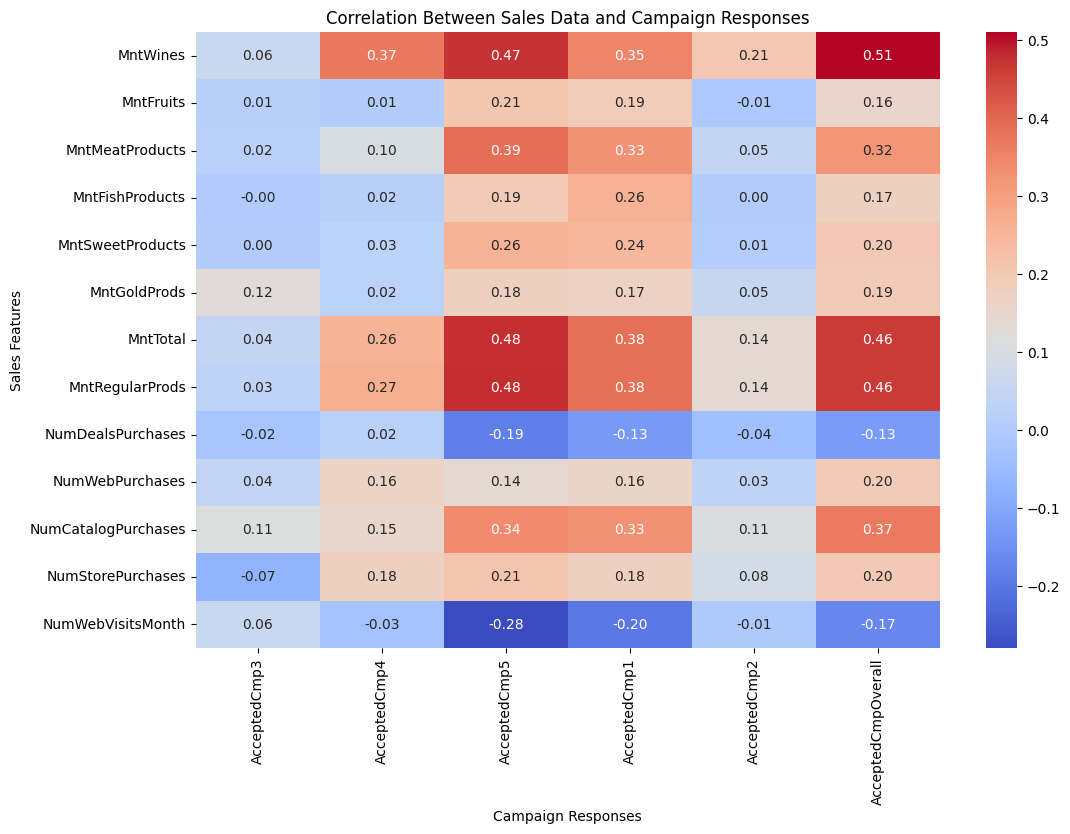

In [52]:
# Heatmap for the correlation between all sales metrics and all campaigns

sales_data = pd.read_csv('sales_data.csv')

sales_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'MntRegularProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]
campaign_columns = [
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
    'AcceptedCmpOverall'
]

correlation_matrix = sales_data[sales_columns + campaign_columns].corr()
correlation_with_campaigns = correlation_matrix.loc[sales_columns, campaign_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_campaigns, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Sales Data and Campaign Responses')
plt.xlabel('Campaign Responses')
plt.ylabel('Sales Features')
plt.show()

**Decision Tree Building**

In [53]:
sales_data = pd.read_csv('sales_data.csv')

# Prepare the data
X = sales_data.drop(columns=['AcceptedCmpOverall'], errors='ignore')
y = sales_data['AcceptedCmpOverall']

# Define the function to train a decision tree classifier and evaluate performance
def tree_classifier_level(i, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    return clf.score(X_train, y_train), clf.score(X_test, y_test), accuracy

# Define the function to find the best depth for the decision tree
def find_best_depth():
    train_scores = []
    test_scores = []
    accuracy_list = []
    total_score = {
        "Depth": range(1, 21)
    }
    total_score = pd.DataFrame(total_score)
    
    for i in range(1, 21):
        train_score, test_score, accuracy = tree_classifier_level(i, X, y)
        train_scores.append(train_score)
        test_scores.append(test_score)
        accuracy_list.append(accuracy)
        total_score.loc[total_score["Depth"] == i, "Total Score"] = abs(train_score - test_score)
    
    return total_score.loc[total_score["Total Score"].idxmin()]["Depth"], train_scores, test_scores, accuracy_list

**Best Depth and Visualization**

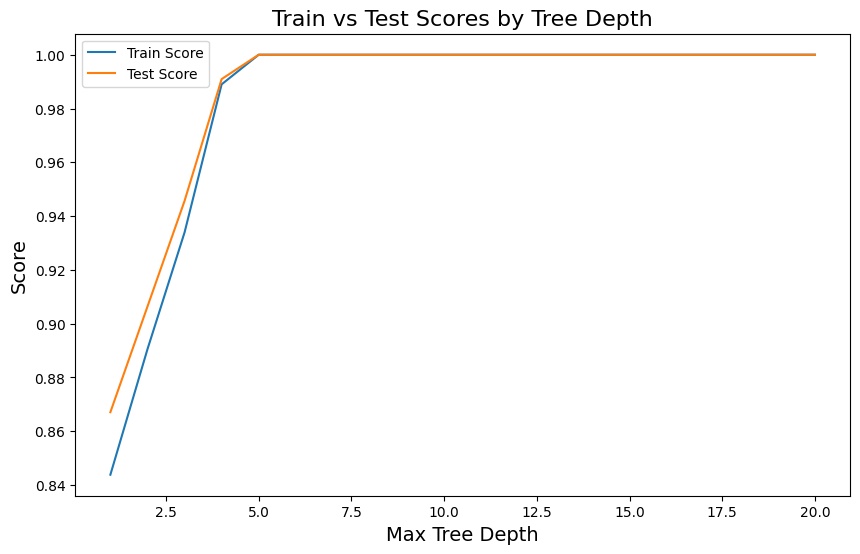

In [54]:
# Find the best depth and visualize results
finc_res = find_best_depth()
train_scores, test_scores, accuracy_list = finc_res[1], finc_res[2], finc_res[3]

# Visualization of train and test scores vs tree depth
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 21), y=train_scores, label='Train Score')
sns.lineplot(x=range(1, 21), y=test_scores, label='Test Score')
plt.xlabel('Max Tree Depth', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Train vs Test Scores by Tree Depth', fontsize=16)
plt.legend()
plt.show()

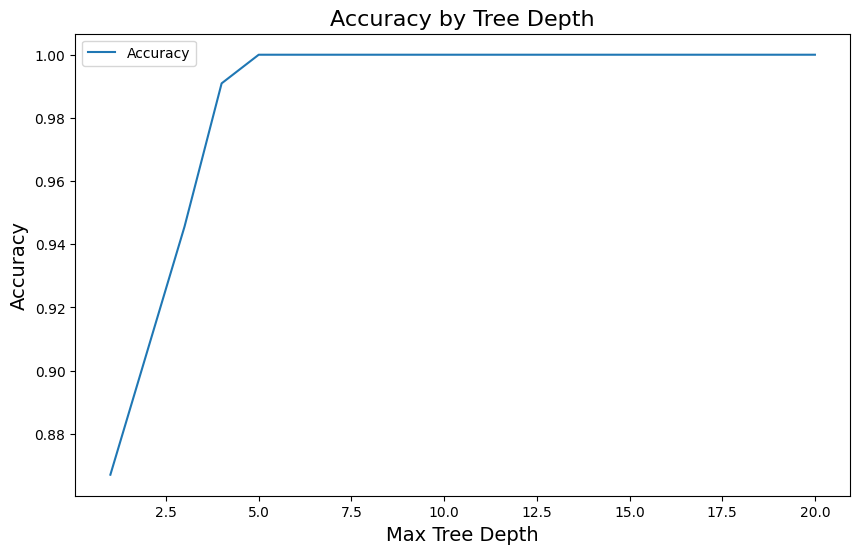

In [55]:
# Accuracy visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 21), y=accuracies, label='Accuracy')
plt.xlabel('Max Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy by Tree Depth', fontsize=16)
plt.legend()
plt.show()

**Image of The Decision Tree**

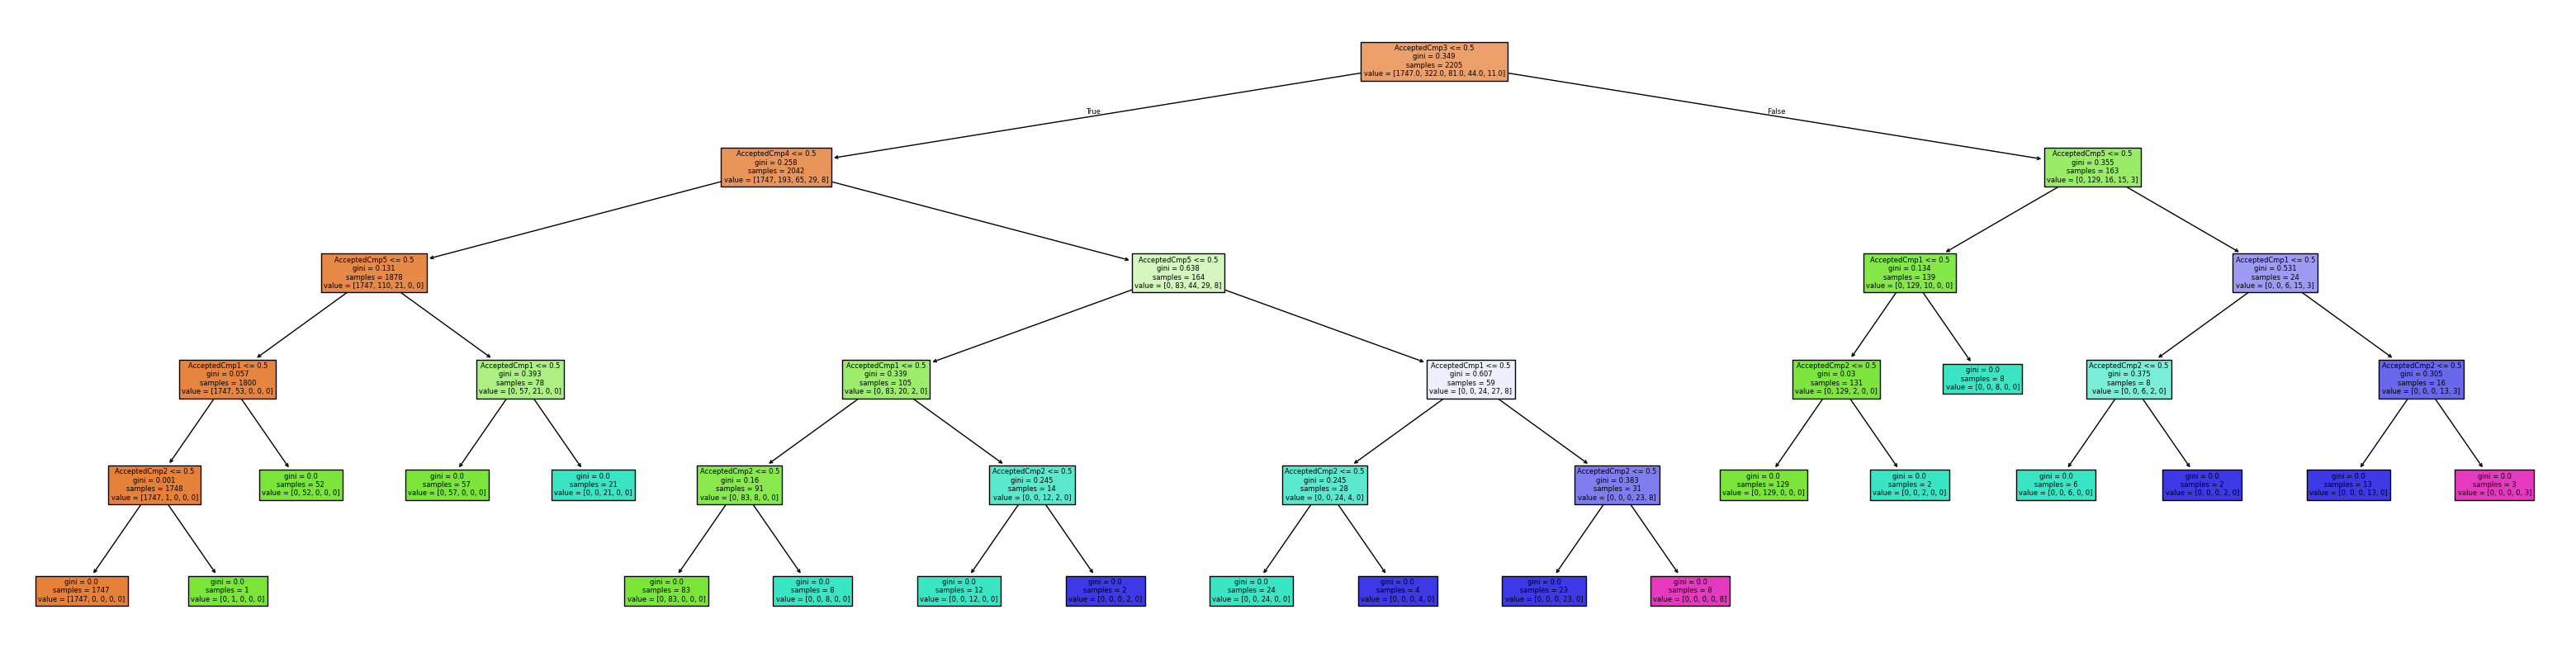

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(40, 10))
plot_tree(clf, filled=True, feature_names=list(X.columns))
plt.show()

**AB Testing**

The correlation analysis reveals that customer spending patterns strongly influence campaign responses, with higher spending on wines (`MntWines`) and total spending (`MntTotal`) being key predictors of success. Catalog purchases (`NumCatalogPurchases`) also show a significant positive correlation, indicating the effectiveness of campaigns targeting catalog shoppers. Conversely, deal-driven purchases (`NumDealsPurchases`) and frequent web visits (`NumWebVisitsMonth`) demonstrate weak or negative correlations, suggesting these customers are less likely to engage with campaigns. These insights highlight the importance of focusing on high-value customers and tailoring campaigns to align with their specific spending preferences, such as promoting wine-related offers or leveraging catalog-based targeting, while avoiding broad strategies that target less responsive segments.